# Punto 4: Modelamiento, Evaluación e Interpretación


Este notebook desarrolla el **ciclo de modelamiento predictivo** sobre el dataset de Uber (`data.csv`)

In [57]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.feature_selection import mutual_info_classif
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics


In [58]:
data = pd.read_csv('./data/data.csv')
data.head()

,Date,Time,Booking ID,Booking Status,Customer ID,Vehicle Type,Pickup Location,Drop Location,Avg VTAT,Avg CTAT,...,Reason for cancelling by Customer,Cancelled Rides by Driver,Driver Cancellation Reason,Incomplete Rides,Incomplete Rides Reason,Booking Value,Ride Distance,Driver Ratings,Customer Rating,Payment Method
0,23/03/2024,12:29:38,CNR5884300,NoDriverFound,CID1982111,eBike,PalamVihar,Jhilmil,0.0,0.0,...,NaN,0,NaN,0,NaN,0,0.00,4.23,4.4,NaN
1,29/11/2024,18:01:39,CNR1326809,Incomplete,CID4604802,GoSedan,ShastriNagar,GurgaonSector56,4.9,0.0,...,NaN,0,NaN,1,VehicleBreakdown,237,5.73,4.23,4.4,UPI
2,23/08/2024,8:56:10,CNR8494506,Completed,CID9202816,Auto,Khandsa,MalviyaNagar,13.4,0.0,...,NaN,0,NaN,0,NaN,627,13.58,4.90,4.9,DebitCard
3,21/10/2024,17:17:25,CNR8906825,Completed,CID2610914,PremierSedan,CentralSecretariat,Inderlok,13.1,0.0,...,NaN,0,NaN,0,NaN,416,34.02,4.60,5.0,UPI
4,16/09/2024,22:08:00,CNR1950162,Completed,CID9933542,Bike,GhitorniVillage,KhanMarket,5.3,0.0,...,NaN,0,NaN,0,NaN,737,48.21,4.10,4.3,UPI


In [59]:
target = 'Booking Status'
y = data[target].astype(str)
X = data.drop(columns=[target])

num_cols = [c for c in X.columns if np.issubdtype(X[c].dtype, np.number)]
cat_cols = [c for c in X.columns if c not in num_cols]
print("Variables numéricas:", num_cols)
print("Variables categóricas:", cat_cols)

Variables numéricas: ['Avg VTAT', 'Avg CTAT', 'Cancelled Rides by Customer', 'Cancelled Rides by Driver', 'Incomplete Rides', 'Booking Value', 'Ride Distance', 'Driver Ratings', 'Customer Rating']
Variables categóricas: ['Date', 'Time', 'Booking ID', 'Customer ID', 'Vehicle Type', 'Pickup Location', 'Drop Location', 'Reason for cancelling by Customer', 'Driver Cancellation Reason', 'Incomplete Rides Reason', 'Payment Method']


In [60]:
def cambiodetipo(array, tipo):
    for each in array:
        data[each] = data[each].astype(tipo);

In [61]:
#Correccion de tipo de datos
variables_categoricas_a_corregir = ['Vehicle Type', 'Booking Status', 'Reason for cancelling by Customer',
                                    'Driver Cancellation Reason', 'Incomplete Rides Reason', 'Payment Method']
cambiodetipo(variables_categoricas_a_corregir, 'category')
cambiodetipo(['Pickup Location', 'Drop Location', 'Booking ID', 'Customer ID'], 'string')
data['Date'] = pd.to_datetime(data['Date'], format='%d/%m/%Y')
data['Time'] = pd.to_datetime(data['Time'], format='%H:%M:%S')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 21 columns):
 #   Column                             Non-Null Count   Dtype         
---  ------                             --------------   -----         
 0   Date                               150000 non-null  datetime64[ns]
 1   Time                               150000 non-null  datetime64[ns]
 2   Booking ID                         150000 non-null  string        
 3   Booking Status                     150000 non-null  category      
 4   Customer ID                        150000 non-null  string        
 5   Vehicle Type                       150000 non-null  category      
 6   Pickup Location                    150000 non-null  string        
 7   Drop Location                      150000 non-null  string        
 8   Avg VTAT                           150000 non-null  float64       
 9   Avg CTAT                           150000 non-null  float64       
 10  Cancelled Rides by C

In [62]:
min_max_scaler = MinMaxScaler()
variables_numericas = ['Cancelled Rides by Customer', 'Cancelled Rides by Driver', 'Incomplete Rides']
min_max_scaler.fit(data[variables_numericas])  #Ajuste de los parametros: max - min
data[variables_numericas] = min_max_scaler.transform(data[variables_numericas])
data.head()

,Date,Time,Booking ID,Booking Status,Customer ID,Vehicle Type,Pickup Location,Drop Location,Avg VTAT,Avg CTAT,...,Reason for cancelling by Customer,Cancelled Rides by Driver,Driver Cancellation Reason,Incomplete Rides,Incomplete Rides Reason,Booking Value,Ride Distance,Driver Ratings,Customer Rating,Payment Method
0,2024-03-23,1900-01-01 12:29:38,CNR5884300,NoDriverFound,CID1982111,eBike,PalamVihar,Jhilmil,0.0,0.0,...,NaN,0.0,NaN,0.0,NaN,0,0.00,4.23,4.4,NaN
1,2024-11-29,1900-01-01 18:01:39,CNR1326809,Incomplete,CID4604802,GoSedan,ShastriNagar,GurgaonSector56,4.9,0.0,...,NaN,0.0,NaN,1.0,VehicleBreakdown,237,5.73,4.23,4.4,UPI
2,2024-08-23,1900-01-01 08:56:10,CNR8494506,Completed,CID9202816,Auto,Khandsa,MalviyaNagar,13.4,0.0,...,NaN,0.0,NaN,0.0,NaN,627,13.58,4.90,4.9,DebitCard
3,2024-10-21,1900-01-01 17:17:25,CNR8906825,Completed,CID2610914,PremierSedan,CentralSecretariat,Inderlok,13.1,0.0,...,NaN,0.0,NaN,0.0,NaN,416,34.02,4.60,5.0,UPI
4,2024-09-16,1900-01-01 22:08:00,CNR1950162,Completed,CID9933542,Bike,GhitorniVillage,KhanMarket,5.3,0.0,...,NaN,0.0,NaN,0.0,NaN,737,48.21,4.10,4.3,UPI


In [63]:
#Eliminacion de variables
selected_data = data.copy()
selected_data = selected_data.drop(
    columns=['Booking ID', 'Customer ID', 'Vehicle Type', 'Pickup Location', 'Drop Location', 'Date', 'Time',
             'Customer Rating', 'Driver Ratings'])
selected_data.head()

,Booking Status,Avg VTAT,Avg CTAT,Cancelled Rides by Customer,Reason for cancelling by Customer,Cancelled Rides by Driver,Driver Cancellation Reason,Incomplete Rides,Incomplete Rides Reason,Booking Value,Ride Distance,Payment Method
0,NoDriverFound,0.0,0.0,0.0,NaN,0.0,NaN,0.0,NaN,0,0.00,NaN
1,Incomplete,4.9,0.0,0.0,NaN,0.0,NaN,1.0,VehicleBreakdown,237,5.73,UPI
2,Completed,13.4,0.0,0.0,NaN,0.0,NaN,0.0,NaN,627,13.58,DebitCard
3,Completed,13.1,0.0,0.0,NaN,0.0,NaN,0.0,NaN,416,34.02,UPI
4,Completed,5.3,0.0,0.0,NaN,0.0,NaN,0.0,NaN,737,48.21,UPI


In [64]:
#Reduccion de dimensionalidad
# Cash, NA, Debit
mapa_pago = {
    'DebitCard': 'Debit',
    'CreditCard': 'Debit',
    'UberWallet': 'Debit',
    'Cash': 'Cash',
    'UPI': 'Debit',
}
selected_data['Payment Method'] = selected_data['Payment Method'].map(mapa_pago)
selected_data['Payment Method'] = selected_data['Payment Method'].astype('category');
selected_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 12 columns):
 #   Column                             Non-Null Count   Dtype   
---  ------                             --------------   -----   
 0   Booking Status                     150000 non-null  category
 1   Avg VTAT                           150000 non-null  float64 
 2   Avg CTAT                           150000 non-null  float64 
 3   Cancelled Rides by Customer        150000 non-null  float64 
 4   Reason for cancelling by Customer  10500 non-null   category
 5   Cancelled Rides by Driver          150000 non-null  float64 
 6   Driver Cancellation Reason         27000 non-null   category
 7   Incomplete Rides                   150000 non-null  float64 
 8   Incomplete Rides Reason            9000 non-null    category
 9   Booking Value                      150000 non-null  int64   
 10  Ride Distance                      150000 non-null  float64 
 11  Payment Method            

<Axes: xlabel='Ride Distance'>

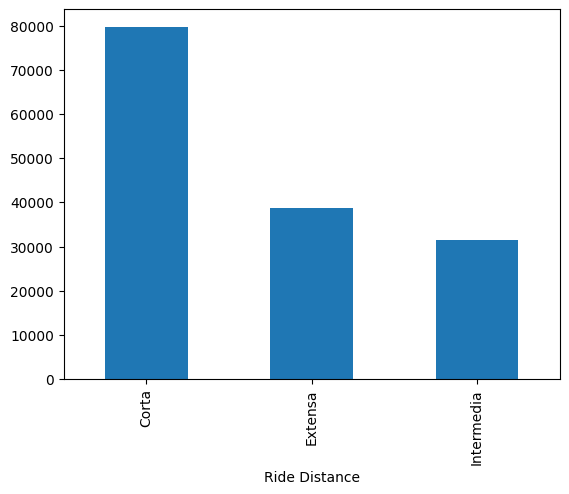

In [65]:
# Transformacion de variables
distance_bins = [0, 15, 30, float('inf')]
distance_labels = ['Corta', 'Intermedia', 'Extensa']

selected_data['Ride Distance'] = pd.cut(selected_data['Ride Distance'], bins=distance_bins, labels=distance_labels,
                                        include_lowest=True)
selected_data['Ride Distance'].value_counts().plot(kind='bar')

<Axes: xlabel='Avg CTAT'>

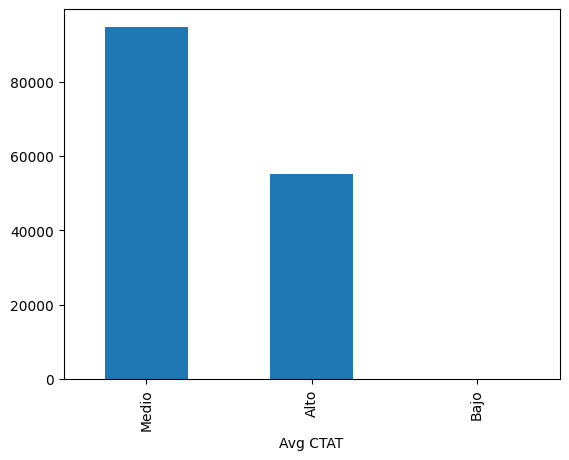

In [66]:
# Transformacion de variables
ctat_bins = [0, 10, 45, float('inf')]
ctat_labels = ['Alto', 'Medio', 'Bajo']

selected_data['Avg CTAT'] = pd.cut(selected_data['Avg CTAT'], bins=ctat_bins, labels=ctat_labels, include_lowest=True)
selected_data['Avg CTAT'].value_counts().plot(kind='bar')

<Axes: xlabel='Avg VTAT'>

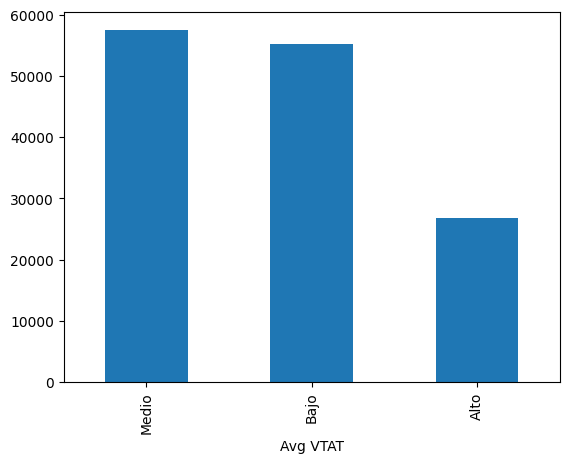

In [67]:
vtat_bins = [2, 7, 12, 20]
vtat_labels = ['Bajo', 'Medio', 'Alto']

selected_data['Avg VTAT'] = pd.cut(
    selected_data['Avg VTAT'],
    bins=vtat_bins,
    labels=vtat_labels,
    include_lowest=True
)
selected_data['Avg VTAT'].value_counts().plot(kind='bar')


In [68]:
#LabelEncoder para la variable objetivo
labelencoder = LabelEncoder()
selected_data["Booking Status"] = labelencoder.fit_transform(data["Booking Status"])
data.head()

,Date,Time,Booking ID,Booking Status,Customer ID,Vehicle Type,Pickup Location,Drop Location,Avg VTAT,Avg CTAT,...,Reason for cancelling by Customer,Cancelled Rides by Driver,Driver Cancellation Reason,Incomplete Rides,Incomplete Rides Reason,Booking Value,Ride Distance,Driver Ratings,Customer Rating,Payment Method
0,2024-03-23,1900-01-01 12:29:38,CNR5884300,NoDriverFound,CID1982111,eBike,PalamVihar,Jhilmil,0.0,0.0,...,NaN,0.0,NaN,0.0,NaN,0,0.00,4.23,4.4,NaN
1,2024-11-29,1900-01-01 18:01:39,CNR1326809,Incomplete,CID4604802,GoSedan,ShastriNagar,GurgaonSector56,4.9,0.0,...,NaN,0.0,NaN,1.0,VehicleBreakdown,237,5.73,4.23,4.4,UPI
2,2024-08-23,1900-01-01 08:56:10,CNR8494506,Completed,CID9202816,Auto,Khandsa,MalviyaNagar,13.4,0.0,...,NaN,0.0,NaN,0.0,NaN,627,13.58,4.90,4.9,DebitCard
3,2024-10-21,1900-01-01 17:17:25,CNR8906825,Completed,CID2610914,PremierSedan,CentralSecretariat,Inderlok,13.1,0.0,...,NaN,0.0,NaN,0.0,NaN,416,34.02,4.60,5.0,UPI
4,2024-09-16,1900-01-01 22:08:00,CNR1950162,Completed,CID9933542,Bike,GhitorniVillage,KhanMarket,5.3,0.0,...,NaN,0.0,NaN,0.0,NaN,737,48.21,4.10,4.3,UPI


In [69]:
#revisionj de fuga de informacion / correlacion

X = selected_data.drop(columns=['Booking Status'])
y = selected_data['Booking Status']

X_enc = X.copy()
for col in X_enc.select_dtypes(include=['object', 'category']).columns:
    le = LabelEncoder()
    X_enc[col] = le.fit_transform(X_enc[col].astype(str))

# Calcular importancia de cada variable respecto al target
mi = mutual_info_classif(X_enc, y, discrete_features='auto')

mi_scores = pd.Series(mi, index=X_enc.columns).sort_values(ascending=False)
print(mi_scores)

Payment Method                       0.634540
Booking Value                        0.627316
Avg CTAT                             0.507381
Driver Cancellation Reason           0.481244
Cancelled Rides by Driver            0.474988
Avg VTAT                             0.340013
Ride Distance                        0.315296
Reason for cancelling by Customer    0.267875
Cancelled Rides by Customer          0.253236
Incomplete Rides Reason              0.241233
Incomplete Rides                     0.227142
dtype: float64


<Axes: ylabel='Frequency'>

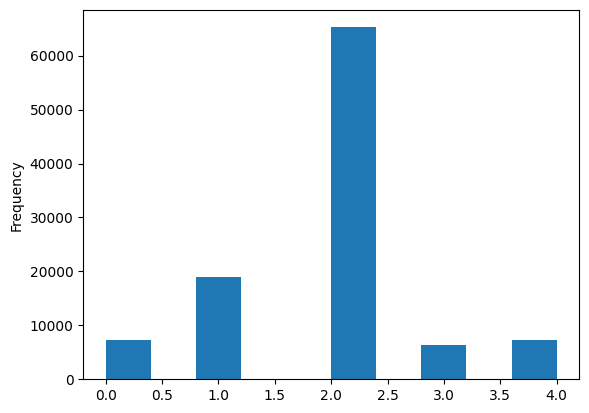

In [70]:
cols_fuga = [
    'Driver Cancellation Reason',
    'Cancelled Rides by Driver',
    'Reason for cancelling by Customer',
    'Cancelled Rides by Customer',
    'Incomplete Rides Reason',
    'Incomplete Rides'
]
#No sirven para predecir, porque estan construidas con la misma informacion que el target.
X = selected_data.drop(columns=cols_fuga + ['Booking Status'])
Y = selected_data['Booking Status']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)  #En regresion no es muestreo estratificado
Y_train.plot(kind='hist')

In [71]:
# Copia del dataset
X_enc = X.copy()

# DecisionTreeClassifier no trabajka con objetos o cats
for col in X_enc.select_dtypes(include=['object', 'category']).columns:
    le = LabelEncoder()
    X_enc[col] = le.fit_transform(X_enc[col].astype(str))

X_train, X_test, Y_train, Y_test = train_test_split(X_enc, Y, test_size=0.3, random_state=42)


In [72]:
#Arbol de clasificación
#class_weight='balanced' balancea automatico
model_dt = DecisionTreeClassifier(criterion='gini', min_samples_leaf=20, max_depth=5, class_weight='balanced' )
model_dt.fit(X_train, Y_train)

#Evaluación
Y_pred = model_dt.predict(X_test)
print(metrics.classification_report(y_true=Y_test, y_pred=Y_pred, target_names=labelencoder.classes_))


                     precision    recall  f1-score   support

CancelledbyCustomer       1.00      0.54      0.70      3075
  CancelledbyDriver       0.85      1.00      0.92      8152
          Completed       0.99      0.67      0.80     27921
         Incomplete       0.21      0.90      0.34      2688
      NoDriverFound       1.00      1.00      1.00      3164

           accuracy                           0.76     45000
          macro avg       0.81      0.82      0.75     45000
       weighted avg       0.92      0.76      0.80     45000



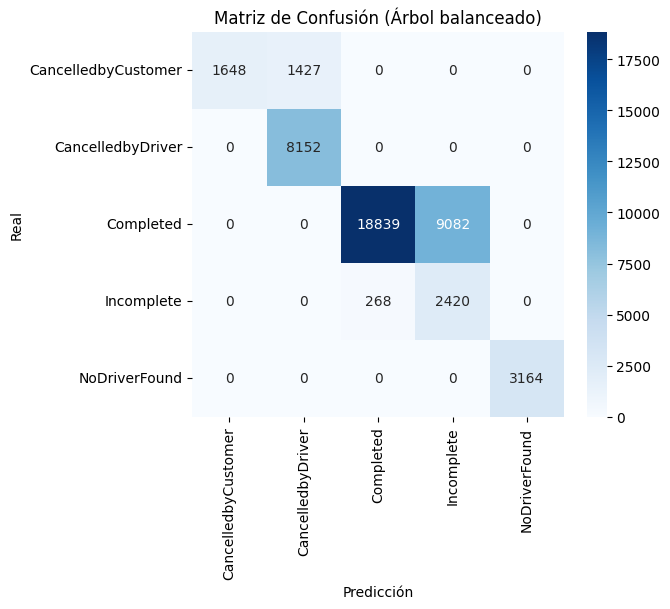

In [74]:
cm = metrics.confusion_matrix(Y_test, Y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=labelencoder.classes_,
            yticklabels=labelencoder.classes_)
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.title("Matriz de Confusión")
plt.show()